This is a simple example of using PySpark. 

Note: Do not use this code directly for any exercise. It is only meant to show you some basics of using RDDs.

In [1]:
from pyspark.context import SparkContext
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
sc = SparkContext()
clear_output()

Generates sample data.

In [3]:
sample_data = np.random.binomial(10, 0.4, 1000)
print(sample_data[:250])

[4 3 1 3 4 6 5 6 3 4 4 2 0 4 7 5 5 4 3 3 5 5 3 4 2 3 5 3 5 4 2 7 3 5 4 4 5
 6 4 4 5 1 6 3 6 1 5 7 5 2 3 3 2 2 2 5 5 3 4 4 5 3 5 4 5 6 5 5 4 3 5 1 3 3
 5 2 5 2 4 3 2 5 7 1 6 6 4 3 4 2 4 4 5 6 3 4 6 3 5 4 5 5 5 9 4 3 3 3 3 4 1
 3 5 3 5 3 7 5 2 4 3 2 7 5 6 3 6 3 4 4 3 2 4 3 4 5 3 5 3 6 3 8 4 3 6 5 4 6
 4 4 4 3 1 6 5 6 5 5 4 4 5 6 2 3 3 2 6 3 1 6 2 3 1 7 1 3 4 1 3 5 5 4 7 6 2
 0 4 3 3 3 7 4 6 4 5 1 7 4 3 4 4 4 5 3 5 4 6 3 2 6 6 2 1 5 4 7 5 8 5 4 3 2
 3 3 6 3 1 4 3 1 6 4 3 5 4 5 3 5 4 7 3 4 6 5 4 5 6 6 4 4]


In [4]:
rdd = sc.parallelize(sample_data)

Determines the maximum number in the data (Using lambda expression).

In [5]:
max_number = rdd.reduce(lambda x, y: max(x, y))
print(f"The maximum number is: {max_number}")
print(f"The maximum number is (using numpy): {np.max(sample_data)}")

The maximum number is: 9
The maximum number is (using numpy): 9


Determines the maximum number in the data (Using a custom function).

In [6]:
def get_highest_int(number1: int, number2: int) -> int:
    if number1 >= number2:
        return number1
    return number2

In [7]:
max_number2 = rdd.reduce(get_highest_int)
print(f"The maximum number is: {max_number2}")

The maximum number is: 9


Determines the count of each element in the data.

In [8]:
numbers_as_key_value_pairs = rdd.map(lambda x: (x, 1))   
print(numbers_as_key_value_pairs.collect()[:20])

[(4, 1), (3, 1), (1, 1), (3, 1), (4, 1), (6, 1), (5, 1), (6, 1), (3, 1), (4, 1), (4, 1), (2, 1), (0, 1), (4, 1), (7, 1), (5, 1), (5, 1), (4, 1), (3, 1), (3, 1)]


In [9]:
count_by_numbers = numbers_as_key_value_pairs.reduceByKey(lambda x, y: x + y)
print(count_by_numbers.collect())

[(0, 7), (1, 42), (2, 117), (3, 201), (4, 236), (5, 215), (6, 126), (7, 46), (8, 8), (9, 2)]


In [10]:
count_by_numbers_sorted = count_by_numbers.sortByKey() 
count_by_numbers_collection = count_by_numbers_sorted.collect()
print(count_by_numbers_collection)

[(0, 7), (1, 42), (2, 117), (3, 201), (4, 236), (5, 215), (6, 126), (7, 46), (8, 8), (9, 2)]


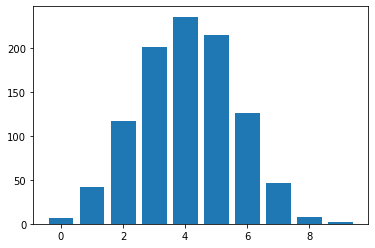

In [11]:
count_by_numbers_array = np.array(count_by_numbers_collection)
numbers = count_by_numbers_array[:, 0]
counts = count_by_numbers_array[:, 1]
plt.bar(numbers, counts)
plt.show()

In [12]:
sc.stop()